<a href="https://colab.research.google.com/github/jmartinbellido/DMBA/blob/main/DMBA3_Python_Notebook3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ISDI DMBA**
# Introduction to Python for Data Analysis
## *Notebook 3: Data Cleaning & Exploratory Data Analysis (EDA)*
---

### TABLE OF CONTENTS
1. DATA CLEANING
2. EDA: FREQUENCY
3. EDA: CORRELATION
4. EDA: DISTRIBUTION
5. EDA: TIME SERIES
6. EXERCISES

### Lecturer: Juan Martin Bellido (jmbelldo@isdi.education)



In [ ]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib.pyplot import figure
from scipy import stats
import scipy
from datetime import datetime

# DATA CLEANING
In this section, we will review three basic data cleaning operations,
*   handling null values
*   removing duplicates
*   identifying outliers


In [ ]:
# Import dataframe
df_jamesbond = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/jamesbond.csv",index_col="Film")

### Handling null values
---

#### *Identify null values in a DataFrame*

The first step is to check if there are indeed null values in the DataFrame and identify on which field.

There are two functions that will help us with this,

```
isna(object)
```
> *The isna() method test if values are NaN (True) or not (False)*

```
any(boolean object)
```
> *The any() method test if at least one of the boolean elements is True*







In [ ]:
# Step 1: apply isna() method to the whole DataFrame to test for NaN values
nan_values = df_jamesbond.isna() # we store the result in a new object
nan_values # let us visualize the object to see what we are doing

,Year,Actor,Director,Box Office,Budget,Bond Actor Salary
Film,,,,,,
Dr. No,False,False,False,False,False,False
From Russia with Love,False,False,False,False,False,False
Goldfinger,False,False,False,False,False,False
Thunderball,False,False,False,False,False,False
Casino Royale,False,False,False,False,False,True
You Only Live Twice,False,False,False,False,False,False
On Her Majesty's Secret Service,False,False,False,False,False,False
Diamonds Are Forever,False,False,False,False,False,False
Live and Let Die,False,False,False,False,False,True


In [ ]:
# Step 2: test if at least one value for each column is True (null)
nan_columns = nan_values.any() # we apply any() to nan_values and store that in a new object
nan_columns # let us visualize what we built
# note: once visualizing the result, we observe that there are NaN values for field "Bond Actor Salary"

Year                 False
Actor                False
Director             False
Box Office           False
Budget               False
Bond Actor Salary     True
dtype: bool

#### *Operate null values in DataFrame*
Once identifying null values, we can decide whether to, 
*   remove full rows with at least one missing value; or 
*   fill null values 



In [ ]:
# We identified NA values in column "Bond Actor Salary", we will now proceed to omit those rows
cond = df_jamesbond["Bond Actor Salary"].isnull()
df_jamesbond[-cond] # we negate condition to omit those rows that are NA for column "Bond Actor Salary"

,Year,Actor,Director,Box Office,Budget,Bond Actor Salary
Film,,,,,,
Dr. No,1962,Sean Connery,Terence Young,448.8,7.0,0.6
From Russia with Love,1963,Sean Connery,Terence Young,543.8,12.6,1.6
Goldfinger,1964,Sean Connery,Guy Hamilton,820.4,18.6,3.2
Thunderball,1965,Sean Connery,Terence Young,848.1,41.9,4.7
You Only Live Twice,1967,Sean Connery,Lewis Gilbert,514.2,59.9,4.4
On Her Majesty's Secret Service,1969,George Lazenby,Peter R. Hunt,291.5,37.3,0.6
Diamonds Are Forever,1971,Sean Connery,Guy Hamilton,442.5,34.7,5.8
Octopussy,1983,Roger Moore,John Glen,373.8,53.9,7.8
A View to a Kill,1985,Roger Moore,John Glen,275.2,54.5,9.1


In [ ]:
# Alternatively, we can opt to fill NAs
# we will proceed to fill NAs with the mean value for the variable
median_bond_salary = df_jamesbond["Bond Actor Salary"].mean() # we calculate the mean
df_jamesbond["Bond Actor Salary"]=df_jamesbond["Bond Actor Salary"].fillna(median_bond_salary) # we replace null values

# Note: in some other cases, we might just want to replace null values by 0 -> .fillna(0)

### Removing duplicates
---

In [ ]:
# Import dataframe
df_duplicates = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/renfe_estaciones_duplicates.csv")

#### *Identify duplicated values*

Key functions in this section,
```
object.duplicated()
```
> *The duplicated() method test if a row is an exact duplicate*



In [ ]:
len(df_duplicates) # check number of rows

630

In [ ]:
# identify duplicated rows
cond = df_duplicates.duplicated()
df_duplicates[cond]

,CODIGO,DESCRIPCION,LATITUD,LONGITUD,DIRECCION,C.P.,POBLACION,PROVINCIA,PAIS
16,5000,GRANADA,37.184036,-3.609036,AVENIDA DE LOS ANDALUCES. S/N,18014.0,Granada,Granada,España
24,10204,ZARZALEJO,40.538817,-4.158073,CALLE DEL FERROCARRIL. S/N,28293.0,Zarzalejo,Madrid,España
57,11208,VITORIA/GASTEIZ,42.841528,-2.672665,PLAZUELA DE LA ESTACION. 1,1005.0,Vitoria-Gasteiz,Araba/Álava,España
74,11203,MANZANOS,42.742875,-2.867530,RIO ZADORRA KALEA. S/N,1220.0,Ribera Baja/Erribera Beitia,Araba/Álava,España
90,15006,CISNEROS,42.191068,-4.850206,CARRETERA P-932 - ESTACION FERROCARRIL. S/N,34320.0,Cisneros,Palencia,España
181,23004,PONTEVEDRA,42.421640,-8.635830,AVENIDA DE LA ESTACION. S/N,36003.0,Pontevedra,Pontevedra,España
222,31205,A GUDIÑA,42.060690,-7.132436,CARRETERA N-525 - BEATO SEBASTIAN APARICIO. S/N,32540.0,Gudiña. A,Ourense,España
227,34005,SAN PEDRO DEL ARROYO,40.803838,-4.871408,CALLE ESTACION FERROCARRIL. S/N,5350.0,San Pedro del Arroyo,Ávila,España
242,35206,NAVALMORAL DE LA MATA,39.894854,-5.545566,PLAZA ESTACION FERROCARRIL. 1,10300.0,Navalmoral de la Mata,Cáceres,España
253,37300,PUERTOLLANO,38.691411,-4.111611,CALLE MUELLE. S/N,13500.0,Puertollano,Ciudad Real,España


#### *Remove duplicated values*

Key functions in this section,
```
object.drop_duplicates()
```
> *The drop_duplicates() method removes duplicated rows*

In [ ]:
df_clean = df_duplicates.drop_duplicates() # we remove duplicates and store the output in a new object

In [ ]:
len(df_clean) # we check again number of rows to confirm new number

620

### Identifying outliers


In [ ]:
# Import dataframe
df_jamesbond = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/jamesbond.csv",index_col="Film")

It is important to identify outliers in numerical fields. Depending on the case, we might only want to check for possible data entry errors or to remove outliers (even when those are not errors).

There are different way to identify outliers in a DataFrame, in this course we will introduce one of the simplest: *normalizing the variable to Z*. For this method, we will assume that the variable is normally distributed. A z score higher than 3 or lower than -3 would indicate that the value is an outlier.


Key functions in this section,

```
stats.zscore(column, nan_policy='omit')
```
> *The szcore() method normalizes (converts) a numerical variable into Z (normal distribution)*





In [ ]:
# We normalize variable Box Office to check outliers
df_jamesbond["z_Box Office"] = stats.zscore(df_jamesbond["Box Office"],nan_policy='omit').round(2)

In [ ]:
# We select variable and its normalized version and sort
df_jamesbond[["Box Office","z_Box Office"]].sort_values("z_Box Office",ascending=False)
# Note: we do not find any outliers, as there are not Z score values higher than 3 or lower than -3

,Box Office,z_Box Office
Film,,
Skyfall,943.5,2.61
Thunderball,848.1,2.06
Goldfinger,820.4,1.90
Spectre,726.7,1.36
Casino Royale,581.5,0.52
From Russia with Love,543.8,0.30
Moonraker,535.0,0.25
The Spy Who Loved Me,533.0,0.24
GoldenEye,518.5,0.16


# EDA: FREQUENCY
When exploring frequency, we try to understand the number occurrences of a repeating event.

*New functions introduced in this section,*
```
describe()
```
> *When applied to a categorical variable, describe() provides basic information about frequency*

```
value_counts(normalize=False)
```
> *This method provides frequency for each unique value. By default, provides frequency in absolute values; we can edit parameter "normalize" to obtain relative frequency*

```
plot(kind='bar'/'barh')
```
> *The plot() method builds different type of visualizations. In this section, we plot bar charts by editing the "kind" parameter*






In [ ]:
# Import dataframe
df_jamesbond = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/jamesbond.csv",index_col="Film")

In [ ]:
# We explore frequency on a single categorical variable
df_jamesbond["Director"].describe()

count            26
unique           13
top       John Glen
freq              5
Name: Director, dtype: object

In [ ]:
# We obtain full frequency in absolute values
df_jamesbond["Director"].value_counts()

John Glen             5
Guy Hamilton          4
Terence Young         3
Lewis Gilbert         3
Martin Campbell       2
Sam Mendes            2
Marc Forster          1
Ken Hughes            1
Michael Apted         1
Roger Spottiswoode    1
Lee Tamahori          1
Peter R. Hunt         1
Irvin Kershner        1
Name: Director, dtype: int64

In [ ]:
# We obtain full frequency in relative values
df_jamesbond["Director"].value_counts(normalize=True)

John Glen             0.192308
Guy Hamilton          0.153846
Terence Young         0.115385
Lewis Gilbert         0.115385
Martin Campbell       0.076923
Sam Mendes            0.076923
Marc Forster          0.038462
Ken Hughes            0.038462
Michael Apted         0.038462
Roger Spottiswoode    0.038462
Lee Tamahori          0.038462
Peter R. Hunt         0.038462
Irvin Kershner        0.038462
Name: Director, dtype: float64

In [ ]:
# We can explore frecuency on the combination of more than one categorical variable
df_jamesbond[["Director","Actor"]].value_counts()

Director            Actor         
Terence Young       Sean Connery      3
John Glen           Roger Moore       3
Sam Mendes          Daniel Craig      2
Guy Hamilton        Sean Connery      2
John Glen           Timothy Dalton    2
Lewis Gilbert       Roger Moore       2
Guy Hamilton        Roger Moore       2
Marc Forster        Daniel Craig      1
Martin Campbell     Daniel Craig      1
                    Pierce Brosnan    1
Lee Tamahori        Pierce Brosnan    1
Ken Hughes          David Niven       1
Michael Apted       Pierce Brosnan    1
Peter R. Hunt       George Lazenby    1
Irvin Kershner      Sean Connery      1
Roger Spottiswoode  Pierce Brosnan    1
Lewis Gilbert       Sean Connery      1
dtype: int64

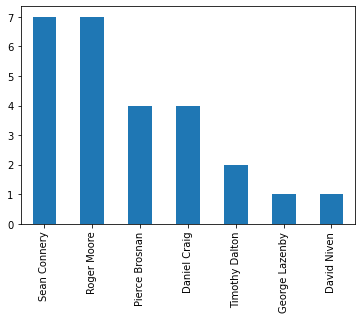

In [ ]:
# Next, we will plot a bar chart to explore frecuency visually
df_jamesbond["Actor"].value_counts().plot(kind = 'bar')

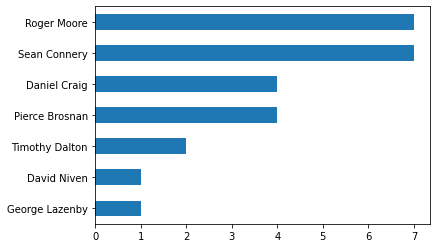

In [ ]:
# Alternatively, we plot a horizontal bar chart
df_jamesbond["Actor"].value_counts().sort_values().plot(kind = 'barh')

# EDA: CORRELATION
When exploring correlation, we look to test and measure the association between two continuous variables.

*New functions introduced in this section,*

```
scipy.stats.pearsonr(x,y)
```
> *This function displays Pearson correlation between two variables. It also provides p-value for testing no correlation (H0: r=0%)*

```
corr()
```
> *This method builds a correlation matrix using all numerical variables*

```
plot(x,y,kind="scatter")
```
> *In this section, we will use the plot() method to visualize scatter plots*

```
sn.heatmap(object, annot=True)
```
> *This method displays heatmap charts. The "annot" paramater allows to incorporate annotations to the chart*


In [ ]:
# Import dataframe
df_jamesbond = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/jamesbond.csv",index_col="Film")

In [ ]:
# We obtain Pearson's correlation rate (r) between two variables
scipy.stats.pearsonr(df_jamesbond["Box Office"],df_jamesbond["Budget"])
## Interpretation of the result: correlation rate is positive and low (28%); p-value shows no correlation

(0.28318466575203255, 0.1609638785608065)

In [ ]:
# Next, we will build a correlation matrix to evaluate all relevant variables
df_jamesbond[["Box Office","Budget","Bond Actor Salary"]].corr()
## Interpretation of the result: "Budget" and "Bond Actor Salary" are the two highest correlated variables

,Box Office,Budget,Bond Actor Salary
Box Office,1.000000,0.283185,0.069542
Budget,0.283185,1.000000,0.728390
Bond Actor Salary,0.069542,0.728390,1.000000


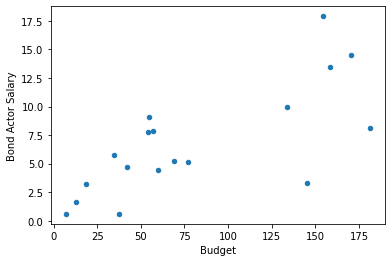

In [ ]:
# We use the plot() method to generate a scatter plot
df_jamesbond.plot("Budget","Bond Actor Salary",kind="scatter")

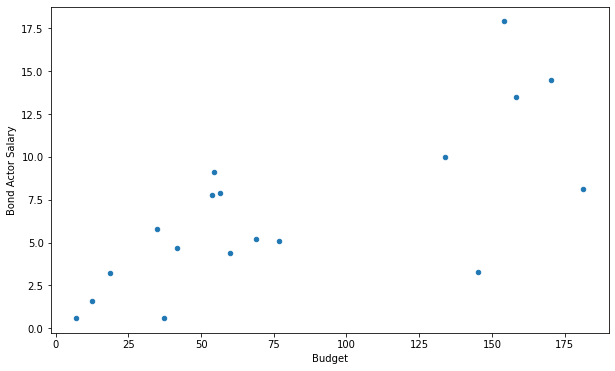

In [ ]:
# We can edit the "figsize" parameter to change the chart size
df_jamesbond.plot("Budget","Bond Actor Salary",kind="scatter",figsize=(10,6))

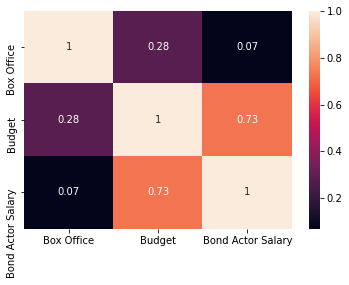

In [ ]:
# To visualize the correlation matrix, we can plot a heatmap
corrMatrix= df_jamesbond[["Box Office","Budget","Bond Actor Salary"]].corr()
sn.heatmap(corrMatrix, annot=True)

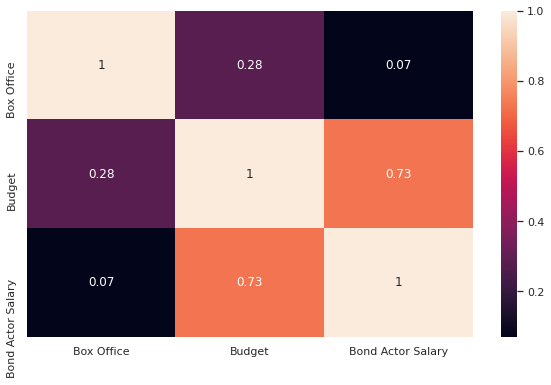

In [ ]:
# The following line changes Seaborn charts size globally
sn.set(rc={'figure.figsize':(10,6)}) # we change size of all Seaborn package (sn) charts

# We repeat the exercise
corrMatrix= df_jamesbond[["Box Office","Budget","Bond Actor Salary"]].corr()
sn.heatmap(corrMatrix, annot=True)

# EDA: DISTRIBUTION
When exploring distribution, we aim to understand how dispersed or gather are the observations on a continuous variable.

*New functions introduced in this section,*

```
describe(object,percentiles=[...])
```
> *The describe() method, when applied to a numerical variable, displays its distribution. By default it provides quantiles, we can edit this using the "percentiles" parameter*

```
quantile()
```
> *This function return values at the given quantile*

```
hist(bins=x)
```
> *The hist() method plots histograms. We can edit the numerical ranges in X axis using the "bins" parameter*

```
sn.boxplot(x, y, data=object)
```
> *This method builds boxplots*



In [ ]:
# Import datafrane
df_jamesbond = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/jamesbond.csv",index_col="Film")

In [ ]:
# We select relevant variables and get distribution
df_jamesbond[["Box Office","Budget","Bond Actor Salary"]].describe()

,Box Office,Budget,Bond Actor Salary
count,26.000000,26.000000,18.000000
mean,491.611538,80.719231,6.850000
std,176.740396,57.097608,4.805175
min,250.900000,7.000000,0.600000
25%,375.350000,38.450000,3.575000
50%,461.750000,60.050000,5.500000
75%,534.500000,123.300000,8.850000
max,943.500000,206.300000,17.900000


In [ ]:
# Let us now edit the distribution from quantiles to deciles
df_jamesbond[['Box Office','Budget','Bond Actor Salary']].describe(
    percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9] # we edit the distribution 
    ).T # we pivot the table

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
Box Office,26.0,491.611538,176.740396,250.9,302.50,334.00,409.75,448.80,461.75,514.20,525.75,543.80,773.55,943.5
Budget,26.0,80.719231,57.097608,7.0,23.15,34.70,43.50,54.50,60.05,76.90,88.75,145.30,164.25,206.3
Bond Actor Salary,18.0,6.850000,4.805175,0.6,1.30,3.24,4.43,5.02,5.50,7.82,8.08,9.64,13.80,17.9


In [ ]:
# Let us extract the value at a given quantile
df_jamesbond['Box Office'].quantile(0.20)
## Result interpretation: the highest 20% of movies genereated 375.35 in box office 

375.35

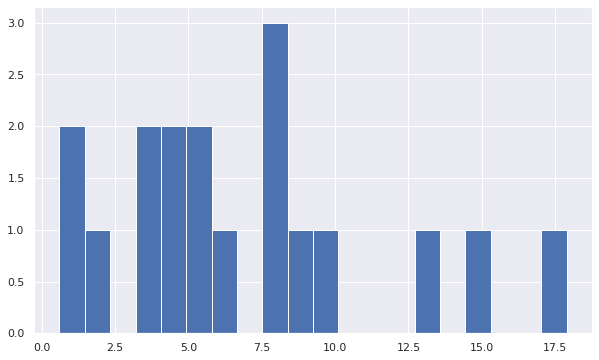

In [ ]:
# We now plot a histogram to visualize distribution
df_jamesbond["Bond Actor Salary"].hist(bins=20) # we edit the "bins" parameter

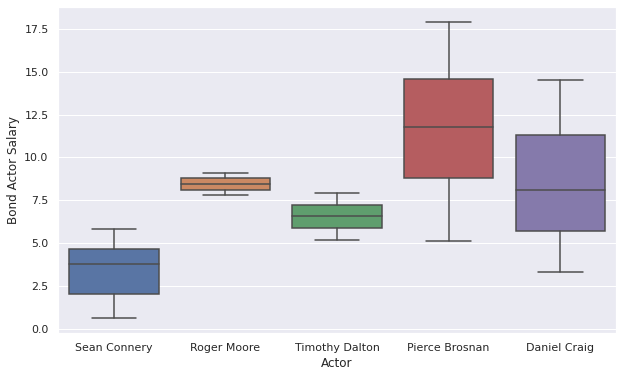

In [ ]:
# Next, we plot a boxplot to visualize the distribution by groups created based on a categorical variable

# We will plot the distribution of salaries perceived by specific actors
cond = df_jamesbond["Actor"].isin(['Sean Connery','Daniel Craig','Roger Moore','Pierce Brosnan','Timothy Dalton'])
# We plot the boxplot
sn.boxplot(x="Actor", y="Bond Actor Salary", data=df_jamesbond[cond])

# EDA: TIME SERIES
In a time series, we look to explore the evolution of a numerical variable across time.

*New functions introduced in this section:*

```
plot()
```
> *By default, the plot() method builds time series. We only need to parse a DataFrame that is indexed by the time variable we want to use*

```
to_datetime()
```
> *This method allows to change variable from string (object) type to date format*

```
dt.year
dt.month
dt.day
dt.isocalendar().week
```
> *These methods allow to extract date parts from a date format variable*



### Plotting time series
---

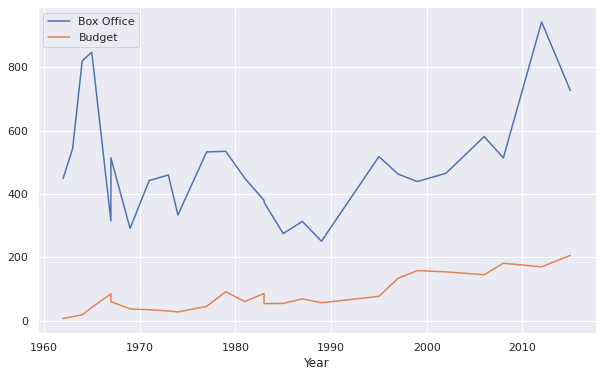

In [ ]:
# Let us build a time series chart with two variables
df_jamesbond.set_index("Year")[["Box Office","Budget"]].plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff5c5cf0110>,
      dtype=object)

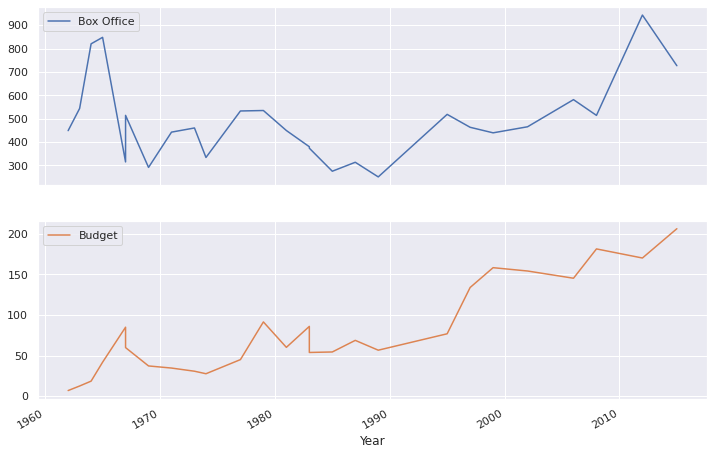

In [ ]:
# Let us now repeat the same exercise but (i) modifying the chart size and (ii) separating each variable into single charts
df_jamesbond.set_index("Year")\
    [["Box Office","Budget"]]\
    .plot(figsize=(12,8),subplots=True) # subplots allows to build independent charts for each variable

### Transforming date variables
---

In [ ]:
# Import dataframe
df_amzn = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/amzn_stocks.csv")
df_amzn.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [ ]:
# We transform the Date variable into date format and check the result
df_amzn["Date"] = pd.to_datetime(df_amzn['Date'], format='%Y-%m-%d')
df_amzn.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

In [ ]:
# We now create specific fields to capture Year, Month and Week
df_amzn["Year"] = df_amzn["Date"].dt.year
df_amzn["Month"] = df_amzn["Date"].dt.month
df_amzn["Week"] = df_amzn["Date"].dt.isocalendar().week

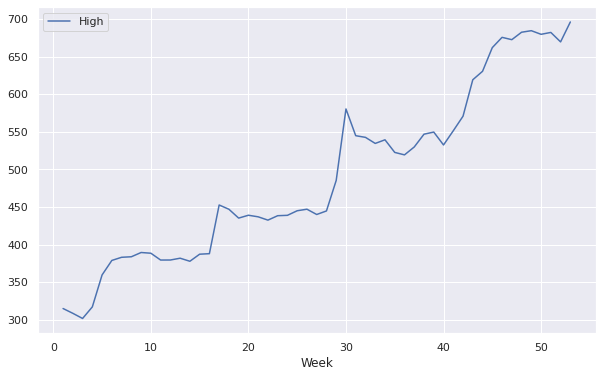

In [ ]:
# We aggregate daily data to weekly and plot the week on week evolution in 2015
df_amzn[df_amzn["Year"]==2015]\
    .groupby(["Week"])\
    .agg({"High":"max"})
    .plot()

# EXERCISES

##### EX 1
> Dataset https://data-wizards.s3.amazonaws.com/datasets/dataset_star_wars.csv

Identify fields with missing values. Remove observations with null values for any numerical variable

---


In [ ]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib.pyplot import figure
from scipy import stats
import scipy
from datetime import datetime

In [ ]:
# Importing df
df_starwars = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/dataset_star_wars.csv")
df_starwars.dtypes

name           object
height        float64
mass          float64
hair_color     object
skin_color     object
eye_color      object
birth_year    float64
gender         object
homeworld      object
species        object
dtype: object

In [ ]:
df_starwars.isna().any()

name          False
height         True
mass           True
hair_color     True
skin_color    False
eye_color     False
birth_year     True
gender         True
homeworld      True
species        True
dtype: bool

In [ ]:
# We now omit rows with null values for numerical variables
cond_1 = df_starwars["height"].isna()
cond_2 = df_starwars["mass"].isna()
cond_3 = df_starwars["birth_year"].isna()

df_starwars_clean = df_starwars[-(cond_1 & cond_2 & cond_3)]

##### EX 2
> Dataset https://data-wizards.s3.amazonaws.com/datasets/movies.csv

##### 2.1 Plot a histogram on variable *IMDB score*
##### 2.2 How many directors are included in the dataset?
##### 2.3 Extract top 10 variables with highest correlation to field *IMDB score*
##### 2.4 Extract movies that are outliers (z>3) in terms of duration
##### 2.5 Extract movies that are in the upper decile (upper 10%) in *IMDB score*
---


In [ ]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib.pyplot import figure
from scipy import stats
import scipy
from datetime import datetime

In [ ]:
# Importing df
df_movies = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/movies.csv")
df_movies.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

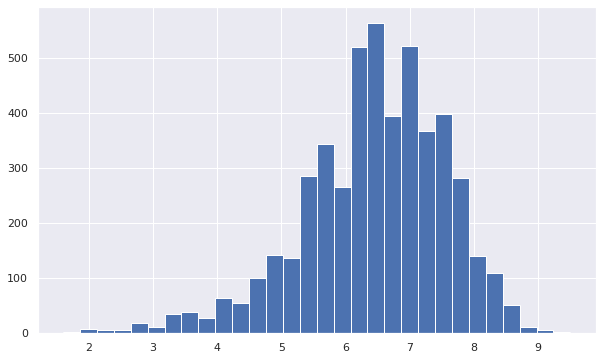

In [ ]:
# EX 2.1
df_movies["imdb_score"].hist(bins=30)

In [ ]:
# EX 2.2
df_movies["director_name"].describe()

count                 4814
unique                2397
top       Steven Spielberg
freq                    26
Name: director_name, dtype: object

In [ ]:
# EX 2.3
df_movies.corr().sort_values("imdb_score",ascending=False).iloc[1:11,]["imdb_score"]

num_voted_users              0.412427
num_critic_for_reviews       0.309733
num_user_for_reviews         0.295779
duration                     0.264440
movie_facebook_likes         0.252496
gross                        0.199914
director_facebook_likes      0.173969
cast_total_facebook_likes    0.086830
actor_2_facebook_likes       0.083761
actor_1_facebook_likes       0.077070
Name: imdb_score, dtype: float64

In [ ]:
# EX 2.4
df_movies["z_duration"] = stats.zscore(df_movies["duration"],nan_policy='omit').round(2)
cond = df_movies["z_duration"] > 3
df_movies[cond].sort_values("duration",ascending=False)[["movie_title","duration","z_duration"]].head()

,movie_title,duration,z_duration
1694,Trapped,511.0,15.98
2436,Carlos,334.0,8.97
1487,"Blood In, Blood Out",330.0,8.82
1134,Heaven's Gate,325.0,8.62
3254,The Legend of Suriyothai,300.0,7.63


In [ ]:
# EX 2.5
cond = df_movies["imdb_score"]>= df_movies["imdb_score"].quantile(.9)
df_movies[cond].sort_values("imdb_score",ascending=False)[["director_name","imdb_score"]]

,director_name,imdb_score
2725,John Blanchard,9.5
1920,Frank Darabont,9.3
3402,Francis Ford Coppola,9.2
4312,John Stockwell,9.1
2779,NaN,9.1
...,...,...
2385,Alejandro G. Iñárritu,7.8
2424,Kenneth Branagh,7.8
2430,Michael Haneke,7.8
2508,Sidney Lumet,7.8


##### EX 3
> Dataset https://data-wizards.s3.amazonaws.com/datasets/dataset_na_who.csv

Build a boxplot to evaluate distribution of GDP per capita by continent

---


In [ ]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib.pyplot import figure
from scipy import stats
import scipy
from datetime import datetime

In [ ]:
# Importing dataframe
df_who = pd.read_csv('https://data-wizards.s3.amazonaws.com/datasets/dataset_na_who.csv')
df_who.dtypes

Country                                                    object
CountryID                                                   int64
ContinentID                                                 int64
Adolescent fertility rate (%)                             float64
Adult literacy rate (%)                                   float64
Gross national income per capita (PPP international $)    float64
Net primary school enrolment ratio female (%)             float64
Net primary school enrolment ratio male (%)               float64
Population (in thousands) total                           float64
Population annual growth rate (%)                         float64
Population in urban areas (%)                             float64
Population living below the poverty line                  float64
Continent                                                  object
dtype: object

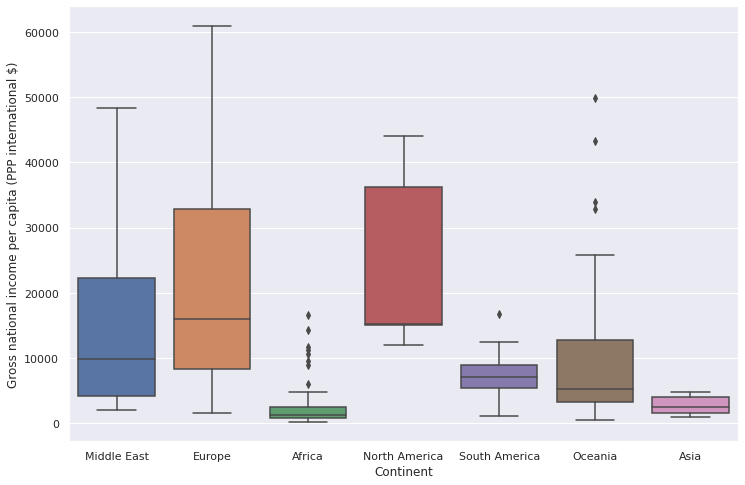

In [ ]:
sn.set(rc={'figure.figsize':(12,8)}) # cambiamos tamaño
# Graficamos un boxplot
sn.boxplot(x="Continent", y="Gross national income per capita (PPP international $)", data=df_who)

##### EX 4
> Dataset https://data-wizards.s3.amazonaws.com/datasets/dataset_bitcoin.csv

Plot the daily evolution of the bitcoin (high) rate since 2018

---

In [ ]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib.pyplot import figure
from scipy import stats
import scipy
from datetime import datetime

In [ ]:
# Importing dataframe
df_bitcoins = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/dataset_bitcoin.csv")
df_bitcoins.dtypes

date           object
Open          float64
High          float64
Low           float64
Close         float64
volume_BTC    float64
volume_usd    float64
dtype: object

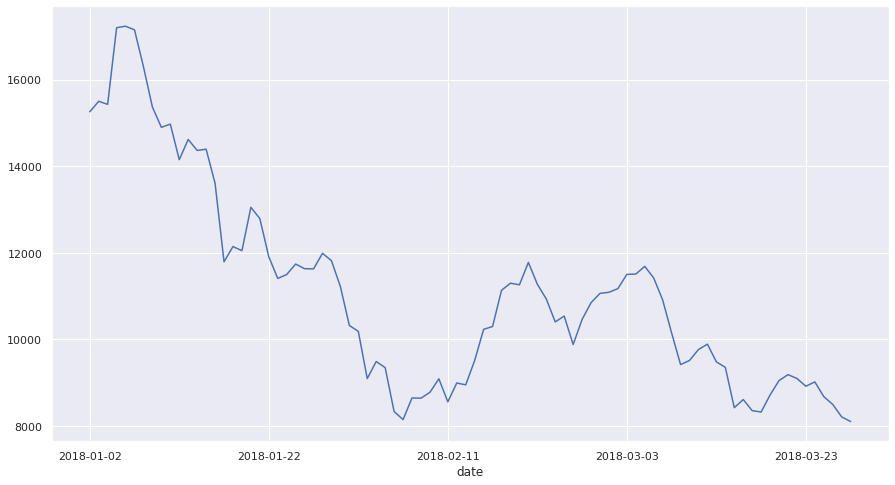

In [ ]:
df_bitcoins[df_bitcoins["date"]>'2018-01-01'].set_index("date")["High"].plot(figsize=(15,8))